# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 6</span>


The goal of this exerscise is to improve a given code simulating the 1D Ising Model of Statistical Mechanics.

**1D Ising Model**

In Statistical Mechanics the Ising Model is a mathematical model of a magnet. It consists of a lattice of discrete variables that represent magnetic dipole moments of atomic spins, that can assume +1 or −1 value (representing up-pointing or down-pointing dipoles of unit magnitude). In 1D and 2D, this model gives the possibility to evaluate the characteristic macroscopic properties of the system analytically.

In 1D, the Hamiltonian for a system of N spins with nearest neighbors interaction is given by the sum of two terms, the first representing the interaction between two neighbour spins and the second one the effect of the external field $h$ on the system:

$$
H = -J\sum_{i=1}^N s_i s_{i+1} -\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

whera $\{ s_i \}_{i=1,N}$ are spin variables taking values in $\{-1;1\}$ and $J$ is the exchange interaction in the ferromagnetic model ($J>0$). We are also assuming to work with a dimentionless problem (and so with units such that $\mu_B=1$ and $k_B=1$) and in Periodic Boundary Conditions ($s_{N+1} = s_{1}$).

Since the system follows the Maxwell-Boltzmann statistics, the probability for it to be in a generic spin configuration $\{ s_i \}$ is the Boltzmann's weight:

$$ p(\{ s_i \})= \frac{e^{-\beta \ H(\{ s_i \})}}{Z}$$


where $\beta=1/T$ and $Z$ is the partition function: $Z=\sum_{\{ s_i \}}e^{-\beta \ H(\{ s_i \})}$.

**Metropolis algorithm**
    
A good method to sample the Boltzmann's weight is to use the Metropolis algorithm, as it does not depend upon the normalization of the probability (in this case the partition function, that is computationally demanding to sample)

The structure of the algorithm is explained in exercise (5). Here a Monte Carlo step will consist in trying to flip a randomly selected spin of the system. Thus, the transition probability is symmetric and the acceptance probability can be computed as:
 
$$ A(s_i'|s_i)=min \left [1, \frac{p(s_i')}{p(s_i)} \right ]=min \left [1, e^{-\beta \ (E(s_i') - E(s_i))} \right ]$$

where $s_i'=-s_i$ and so $E(s_i')-E(s_i)=2s_i \left[ J(s_{i-1}+s_{i+1}) +h \right]$.
  
 
**Gibbs sampling**

The Gibbs sampling is the simplest of the Markov chain sampling methods; it can be seen as a particular case of the Metropolis
algorithm where the proposed move is always accepted.

In fact, it consists in the process of generating a realization of a Markov chain that is built by repeatedly replacing each component $x_k$ with a value $y_k$ picked from its distribution conditional on the current values of all other components, leaving all the components except $x_k$ unchanged. In other words, it is built from a set of base transition probabilities $T_k$ , for $k=1,...,n$ that sample the next move as:

$$T_k(\vec y | \vec x) = p_{1|n-1}(y_k|\{ x_i : i \neq k \})  \prod_{i \neq k} \delta(y_i-x_i)$$

and so the moves are always accepted, i.e. $A(\vec y|\vec x)=1$ and $K(\vec y|\vec x)=T(\vec y|\vec x)$.

If applied to the Ising model, a new value for each spin variable of the system is chosen with the transition probability:

$$T(s_i'|s_i)= \frac{p(s_i'= \pm 1)}{p(s_i=+1)+p(s_i=-1)}$$

which does not depend on the current value of the spin and where the probabilities are the Boltzmann weight. Thus, we can write the transition probability as:

$$ T(s_i'=\pm 1|s_i)=\frac{1}{1+ \text{exp}\left(\mp \ 2 \beta [J(s_{i-1} + s_{i+1}) + h]\right)}$$

### Exercise 06.1

We implement the code for the 1D Ising Model with the two sampling methods in order to generate the successive spin configurations to sample the Boltzmann's weight $p(\{ s_i \}) = \exp(-\beta H)/Z$. We also add the possibility to restart from a previous spin configuration. 

Another implementation of the code consist of the evaluation of the following thermodynamic quantities with the data blocking method:

1. internal energy $U(N,T) = \langle H \rangle_{h=0}$
2. heat capacity $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$
3. magnetic susceptibility: $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. magnetisation: $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

We want to simulate a system composed by $N=50$ spins, with $J=1$ and $T$ in the range $\left[0.5;2.0\right]$.

We can then compare the results of the simulations (obtained with both Metropolis and Gibbs sampling methods) with the theoretical trend of the quantities in function of the temperature $T$.

Before running those simulations, the code has to be implemented with an equilibration routine. To do so, we simulate the system with a large number of MC steps divided in $N=80$ blocks of $L=10^4$ steps for computing the blocking averages. Running the simulation a few times while changing input parameters (temperature and external field), we find the steps needed to obtain a configuration of spin $\{s_i\}$ proportional to the Boltzmann weight and so stable values for the observables. Below is shown an example picture for one of those simulations.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

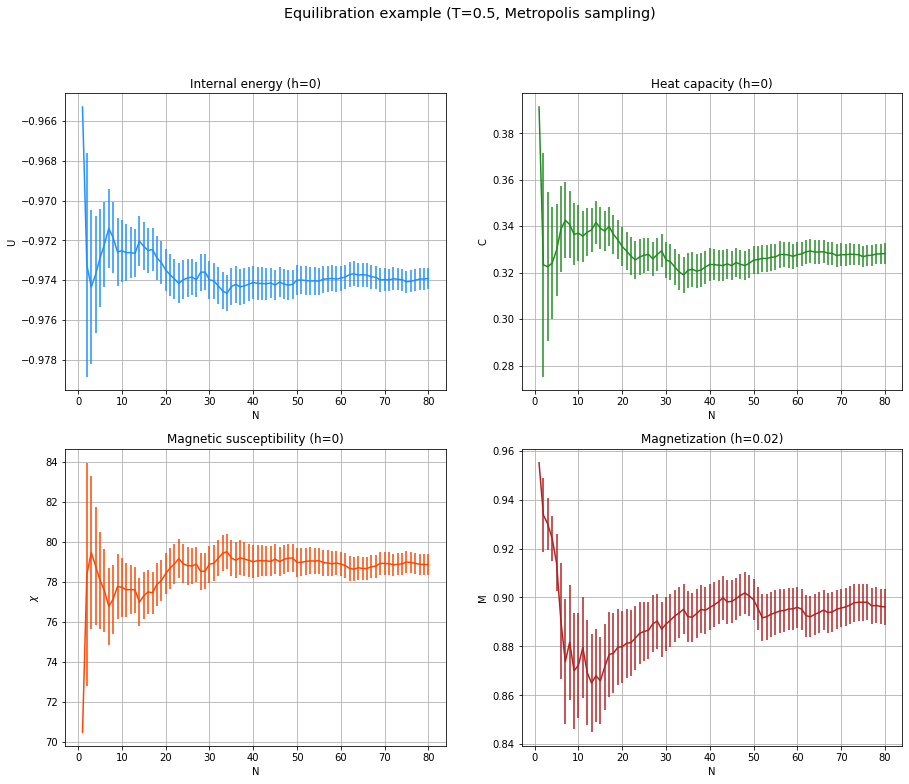

In [9]:
xe, ye, erre = np.loadtxt('equilibration/output.ene.0', usecols=(0,2,3), unpack=True)
xh, yh, errh = np.loadtxt('equilibration/output.heat.0', usecols=(0,2,3), unpack=True)
xx, yx, errx = np.loadtxt('equilibration/output.chi.0', usecols=(0,2,3), unpack=True)
xm, ym, errm = np.loadtxt('equilibration/output.mag.0', usecols=(0,2,3), unpack=True)

fig=plt.figure(figsize=(15, 12))
plt.suptitle("Equilibration example (T=0.5, Metropolis sampling)", size='x-large')

plt.subplot(221)
plt.errorbar(xe, ye, yerr=erre, color='dodgerblue')
plt.title('Internal energy (h=0)')
plt.ylabel('U')
plt.xlabel('N')
plt.grid(True)

plt.subplot(222)
plt.errorbar(xh, yh, yerr=errh, color='forestgreen')
plt.title('Heat capacity (h=0)')
plt.ylabel('C')
plt.xlabel('N')
plt.grid(True)

plt.subplot(223)
plt.errorbar(xx, yx, yerr=errx, color='orangered')
plt.title('Magnetic susceptibility (h=0)')
plt.ylabel('$\chi$')
plt.xlabel('N')
plt.grid(True)

plt.subplot(224)
plt.errorbar(xm, ym, yerr=errm, color='firebrick')
plt.title('Magnetization (h=0.02)')
plt.ylabel('M')
plt.xlabel('N')
plt.grid(True)

plt.show()

In these pictures we can distinguish the equilibration phase in the first $\sim 50$ blocks; after them the thermodynamic properties become quite stable around precise values.

Thus, we modify the code to automatically equilibrate the system: first we make it move without measuring for $50$ blocks, and so for $N_{eq}=50 \times L$ steps, where $L$ is the number of steps in each block.

**Note**: if we want to start from a previous spin configuration and there is no need for equilibration, we can choose not to perform it by changing the imput parametes of the simulation.

**Note**: further instructions on how to properly run the code are in the README.md file.

As our purpose is to simulate a system with temperatures $T$ in the range $[0.5;2.0]$ and to express the thermodynamic properties in function of $T$, we run the code for 30 times in that range of temperatures, with both Metropolis and Gibbs sampling methods, with the following parameters:
- number of blocks $N=20$
- number of steps in each block $L=10000$

The simulations are started each time from a random configuration and so need the equilibration process.

Then, we take only the last value for the mean and its uncertainty of the observables for each simulation, and so for each value of $T$ in the range $[0.5;2.0]$.

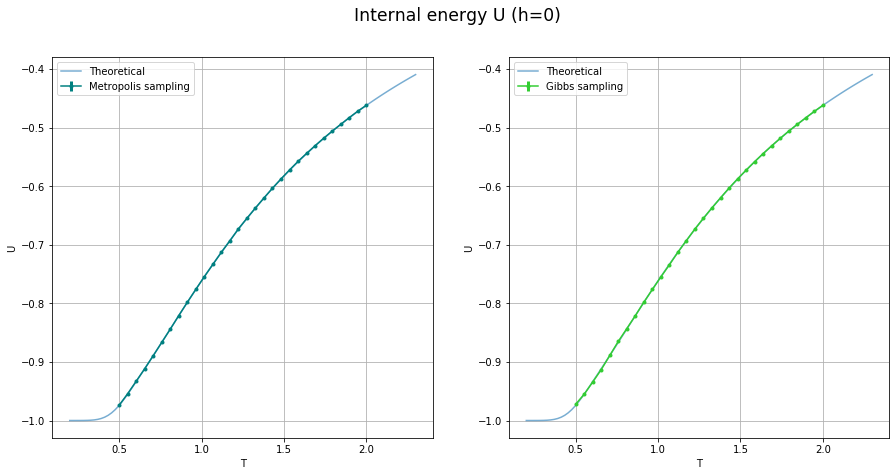

In [11]:
#samplings
tm,em,errem = np.loadtxt("metropolis/output.ene_temp.out", usecols=(0,1,2), unpack=True)
tg,eg,erreg =np.loadtxt("gibbs/output.ene_temp.out", usecols=(0,1,2), unpack=True)

#theoretical
points=100
T = np.linspace(0.2,2.3,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )

plt.figure(figsize=(15, 7))
plt.suptitle('Internal energy U (h=0)', size='xx-large')

plt.subplot(121)
plt.errorbar(tm, em, yerr=errem, marker = '.', elinewidth = 3., color='teal', label='Metropolis sampling')
plt.plot(T, e, alpha=0.6, label='Theoretical')
plt.xlabel('T')
plt.ylabel('U')
plt.grid(True)
plt.legend()

plt.subplot(122)
plt.errorbar(tg, eg, yerr=erreg, marker = '.', elinewidth = 3., color='limegreen', label='Gibbs sampling')
plt.plot(T, e, alpha=0.6, label='Theoretical')
plt.xlabel('T')
plt.ylabel('U')
plt.grid(True)
plt.legend()

plt.show()

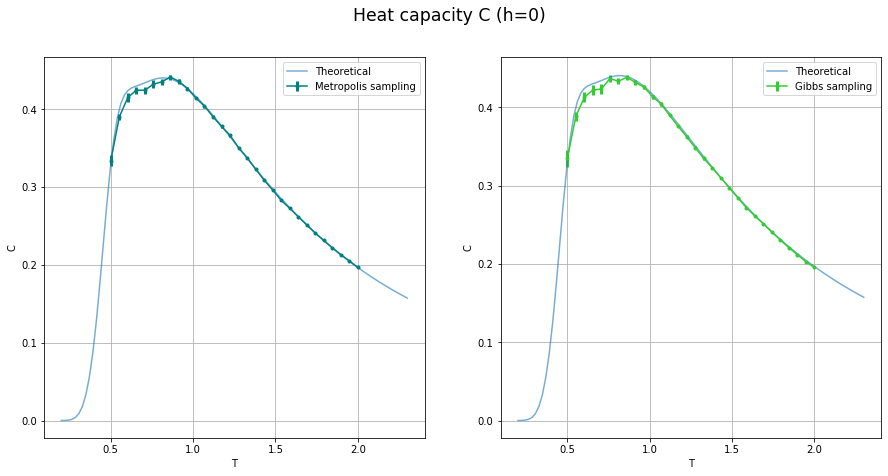

In [12]:
#samplings
tm,cm,errcm = np.loadtxt("metropolis/output.heat_temp.out", usecols=(0,1,2), unpack=True)
tg,cg,errcg =np.loadtxt("gibbs/output.heat_temp.out", usecols=(0,1,2), unpack=True)

#theoretical
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

plt.figure(figsize=(15, 7))
plt.suptitle('Heat capacity C (h=0)', size='xx-large')

plt.subplot(121)
plt.errorbar(tm, cm, yerr=errcm, marker = '.', elinewidth = 3., color='teal', label='Metropolis sampling')
plt.plot(T, heat, alpha=0.6, label='Theoretical')
plt.xlabel('T')
plt.ylabel('C')
plt.grid(True)
plt.legend()

plt.subplot(122)
plt.errorbar(tg, cg, yerr=errcg, marker = '.', elinewidth = 3., color='limegreen', label='Gibbs sampling')
plt.plot(T, heat, alpha=0.6, label='Theoretical')
plt.xlabel('T')
plt.ylabel('C')
plt.grid(True)
plt.legend()

plt.show()

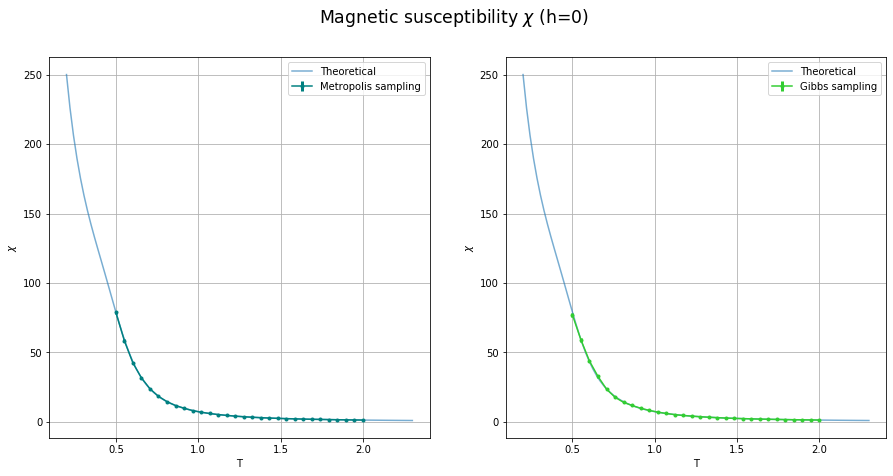

In [15]:
#samplings
tm,xm,errxm = np.loadtxt("metropolis/output.chi_temp.out", usecols=(0,1,2), unpack=True)
tg,xg,errxg =np.loadtxt("gibbs/output.chi_temp.out", usecols=(0,1,2), unpack=True)

#theoretical
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

plt.figure(figsize=(15, 7))
plt.suptitle('Magnetic susceptibility $\chi$ (h=0)', size='xx-large')

plt.subplot(121)
plt.errorbar(tm, xm, yerr=errxm, marker = '.',  elinewidth = 3., color='teal', label='Metropolis sampling')
plt.plot(T, X, alpha=0.6, label='Theoretical')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.grid(True)
plt.legend()

plt.subplot(122)
plt.errorbar(tg, xg, yerr=errxg, marker = '.', elinewidth = 3., color='limegreen', label='Gibbs sampling')
plt.plot(T, X, alpha=0.6, label='Theoretical')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.grid(True)
plt.legend()

plt.show()

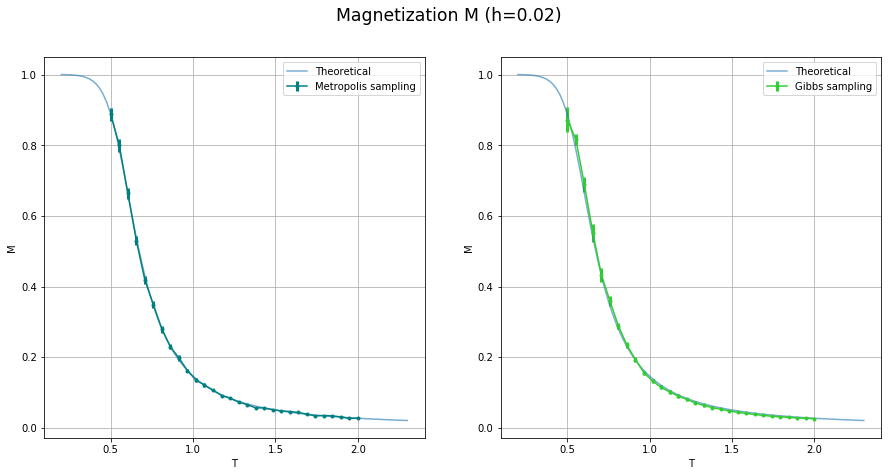

In [14]:
#samplings
tm,mm,errmm = np.loadtxt("metropolis/output.mag_temp.out", usecols=(0,1,2), unpack=True)
tg,mg,errmg =np.loadtxt("gibbs/output.mag_temp.out", usecols=(0,1,2), unpack=True)

#theoretical
h=0.02
b = 1/T
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

plt.figure(figsize=(15, 7))
plt.suptitle('Magnetization M (h=0.02)', size='xx-large')

plt.subplot(121)
plt.errorbar(tm, mm, yerr=errmm, marker = '.', elinewidth = 3., color='teal', label='Metropolis sampling')
plt.plot(T, M, alpha=0.6, label='Theoretical')
plt.xlabel('T')
plt.ylabel('M')
plt.grid(True)
plt.legend()

plt.subplot(122)
plt.errorbar(tg, mg, yerr=errmg, marker = '.', elinewidth = 3., color='limegreen', label='Gibbs sampling')
plt.plot(T, M, alpha=0.6, label='Theoretical')
plt.xlabel('T')
plt.ylabel('M')
plt.grid(True)
plt.legend()

plt.show()


All the simulation results, for every thermodynamic quantity, follow the theoretical expectations very well and the error bars are small. There are not considerable differences between the two sampling methods: they both converge almost exactly.